# Peer‑Graded Notebook: Visualizations, Hypotheses, and Coefficient Analysis

## Objectives
- Generate a tidy synthetic dataset
- Plot a histogram, box plot, bar plot, and scatter plot
- Fit a simple linear regression and compute coefficients
- State hypotheses and test the slope
- Summarize conclusions

## Data

In [1]:
import numpy as np, pandas as pd
rng = np.random.default_rng(42)
n = 120
study_hours = rng.normal(10, 3, n).clip(1, None)
section = rng.choice(['A','B'], size=n, p=[0.55, 0.45])
noise = rng.normal(0, 8, n)
exam_score = 50 + 4.5*study_hours + noise
df = pd.DataFrame({'study_hours':study_hours, 'exam_score':exam_score, 'section':section})
df.head()

,study_hours,exam_score,section
0,10.914151,81.935368,A
1,6.880048,79.658887,A
2,12.251354,96.631776,A
3,12.821694,103.462108,A
4,4.146894,61.646139,A


## Histogram

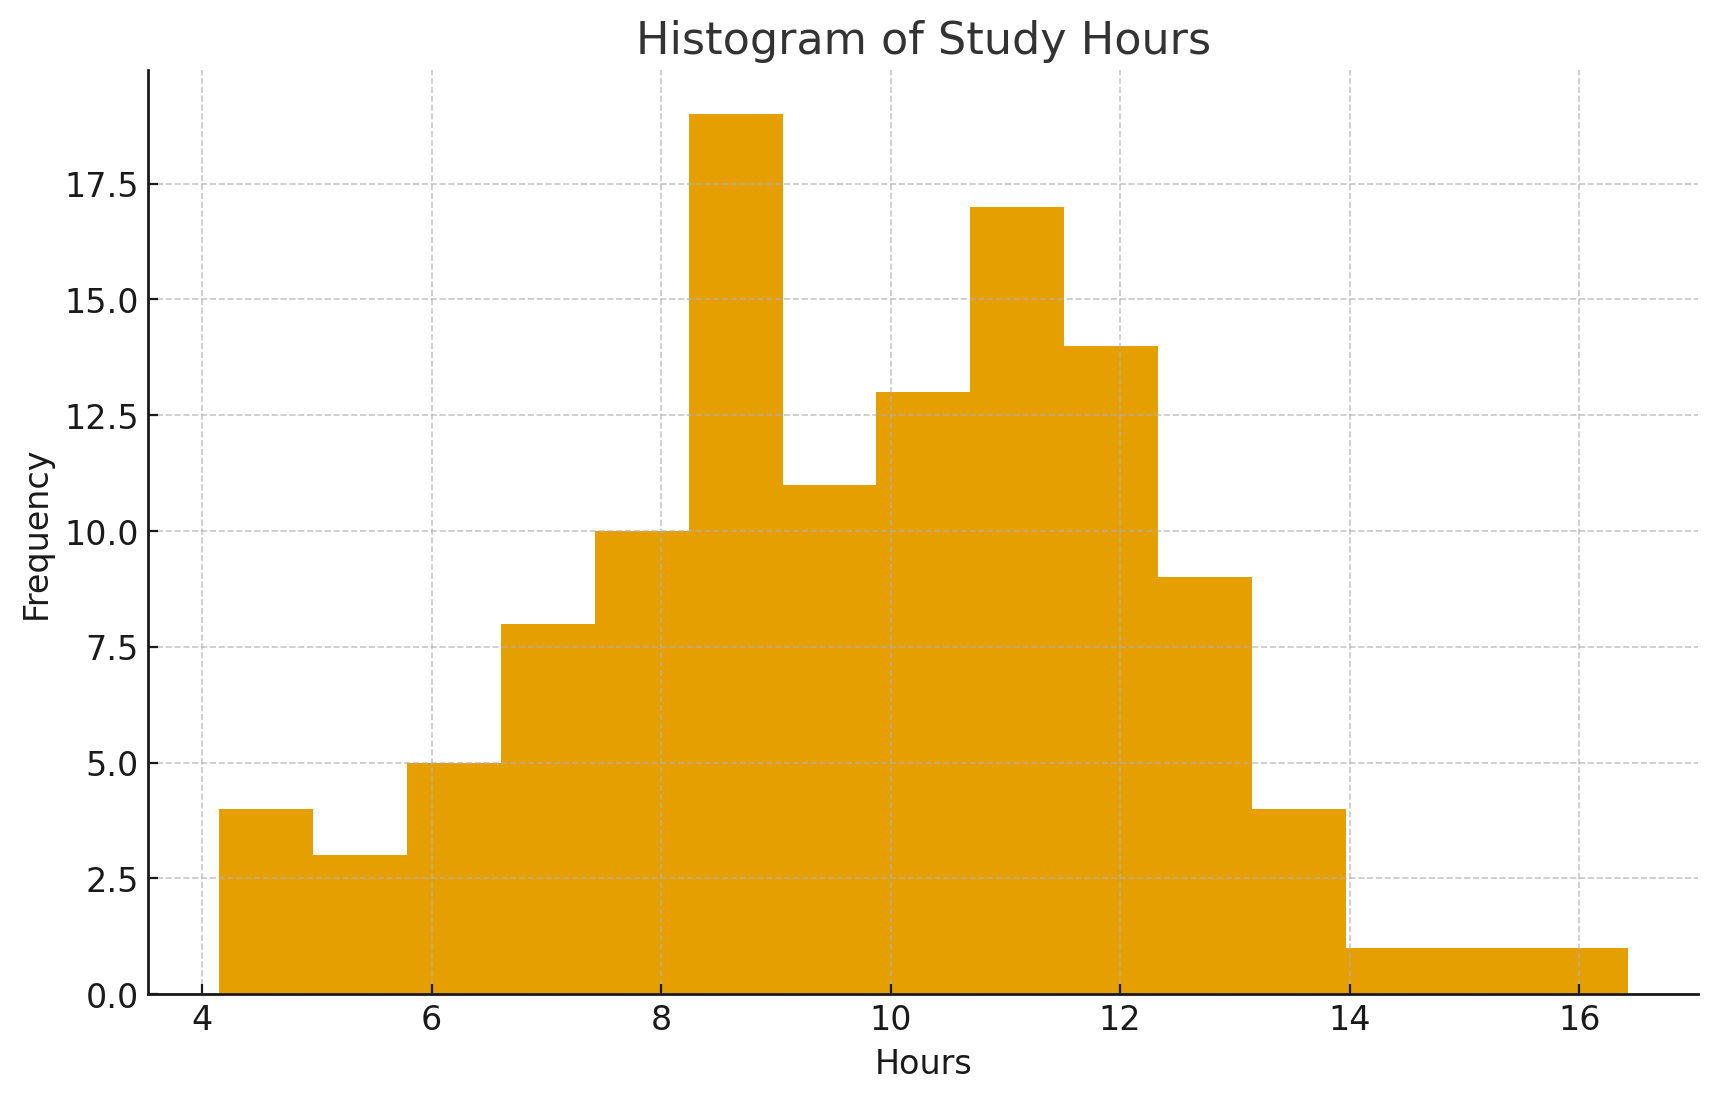

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(df['study_hours'], bins=15)
plt.title('Histogram of Study Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

## Box Plot

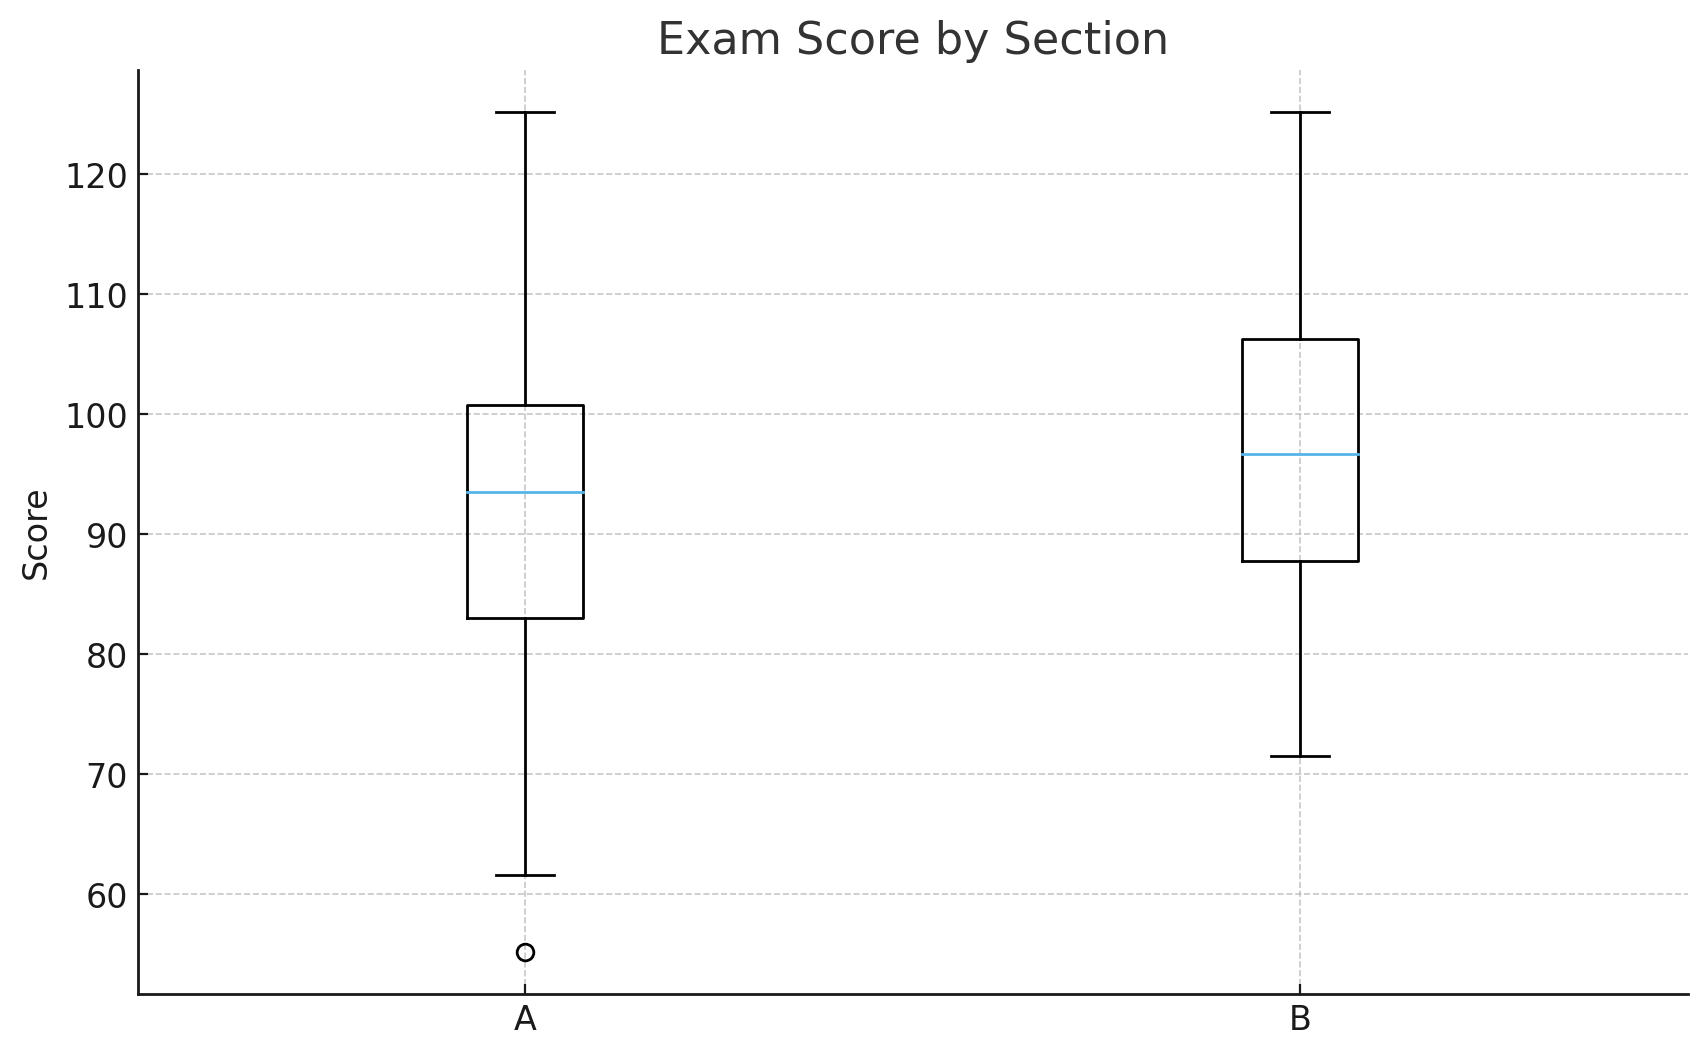

In [3]:
plt.figure()
data_A = df[df['section']=='A']['exam_score']
data_B = df[df['section']=='B']['exam_score']
plt.boxplot([data_A, data_B], labels=['A','B'])
plt.title('Exam Score by Section')
plt.ylabel('Score')
plt.show()

## Bar Plot

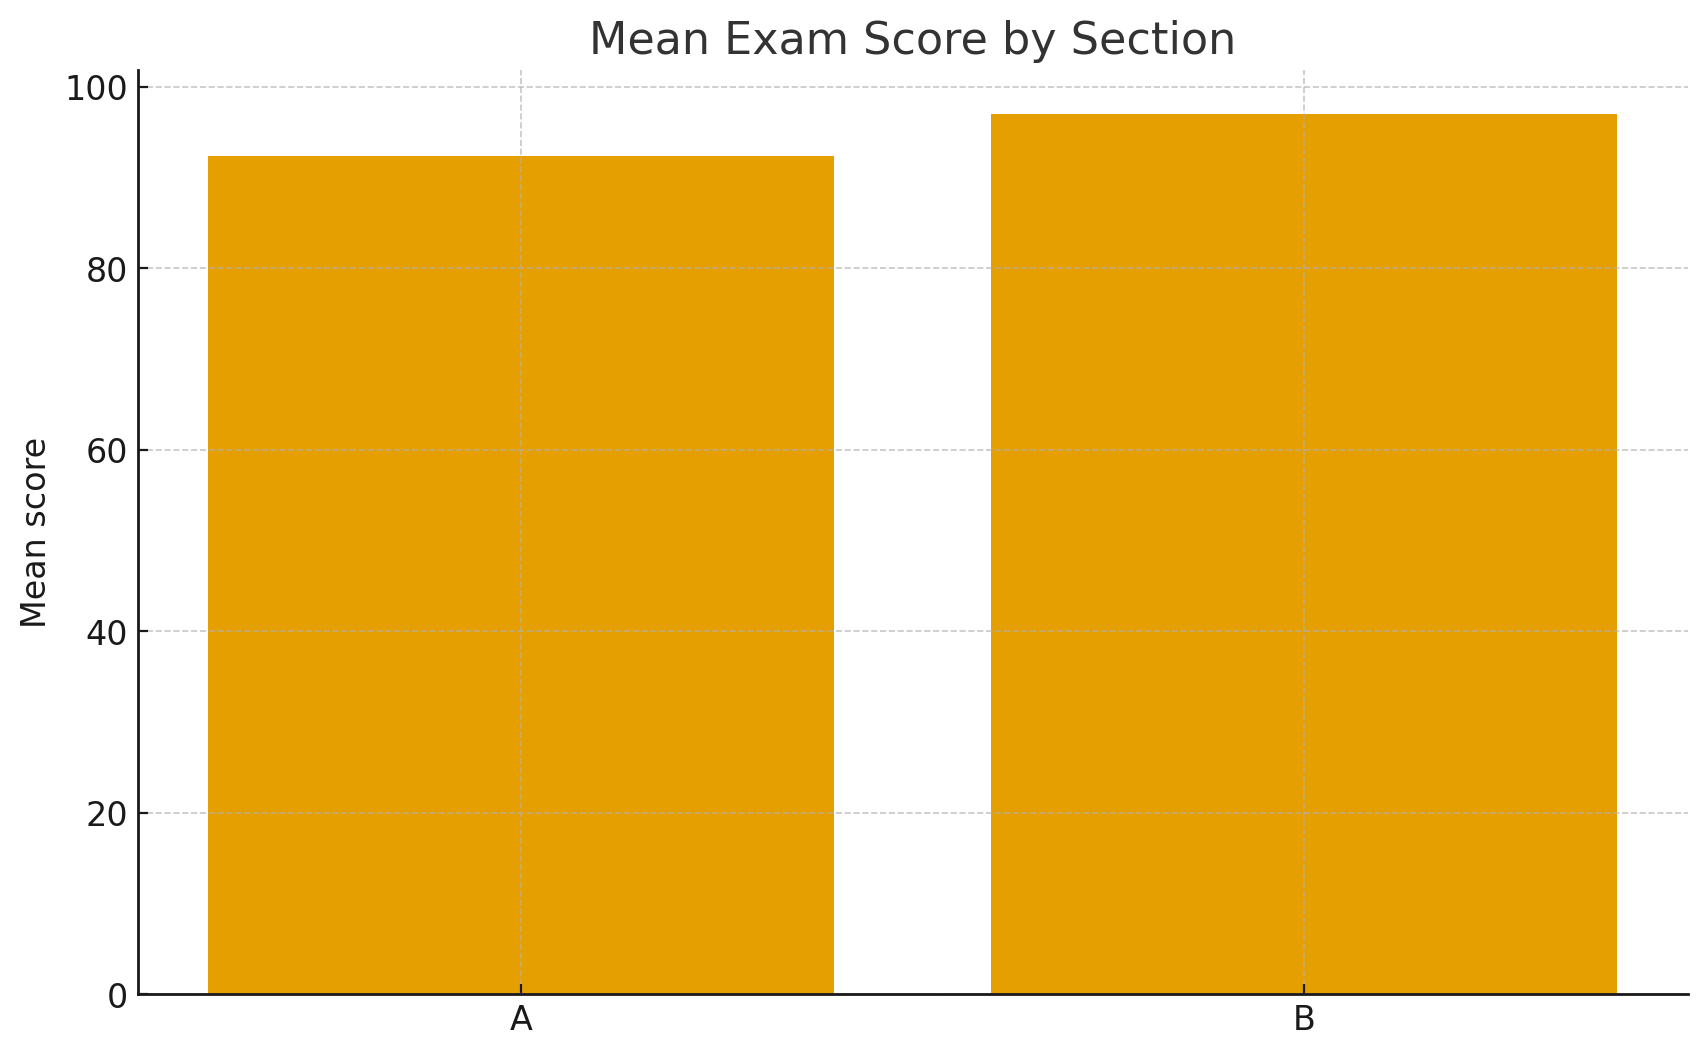

In [4]:
means = df.groupby('section')['exam_score'].mean()
plt.figure()
plt.bar(means.index, means.values)
plt.title('Mean Exam Score by Section')
plt.ylabel('Mean score')
plt.show()

## Scatter Plot with Regression Line

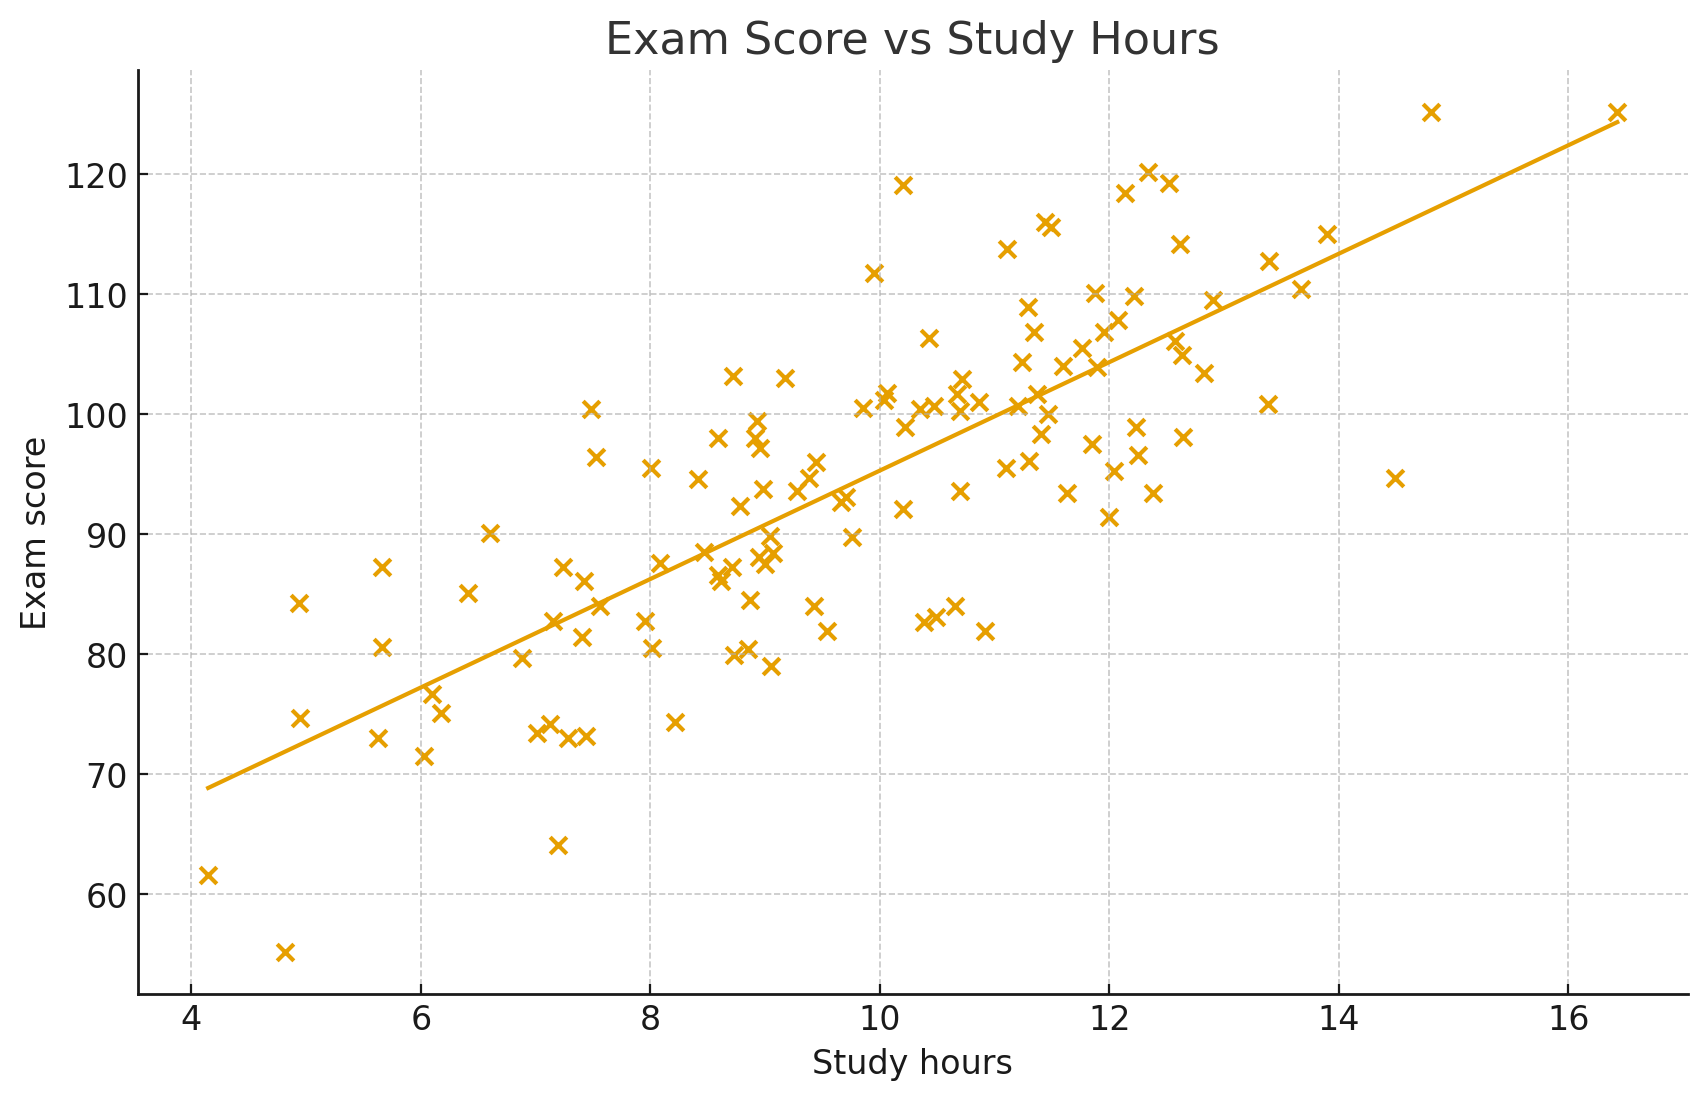

(4.518749083757808, 50.120007511054034)

In [5]:
coef = np.polyfit(df['study_hours'], df['exam_score'], 1)
slope, intercept = coef[0], coef[1]
xgrid = np.linspace(df['study_hours'].min(), df['study_hours'].max(), 100)
yhat = slope*xgrid + intercept

plt.figure()
plt.scatter(df['study_hours'], df['exam_score'])
plt.plot(xgrid, yhat)
plt.title('Exam Score vs Study Hours')
plt.xlabel('Study hours')
plt.ylabel('Exam score')
plt.show()

slope, intercept

## Hypotheses
- **H0:** slope = 0
- **H1:** slope ≠ 0

## Coefficient Analysis

In [6]:
r = np.corrcoef(df['study_hours'], df['exam_score'])[0,1]
R2 = r**2
n_obs = len(df)
t_stat = r * np.sqrt((n_obs - 2) / (1 - r**2))
try:
    from scipy.stats import t as student_t
    p_value = 2*(1 - student_t.cdf(abs(t_stat), df=n_obs-2))
except Exception:
    import mpmath as mp
    nu = n_obs - 2
    x = nu/(nu + t_stat**2)
    I = mp.betainc(nu/2, 0.5, 0, x, regularized=True)
    p_value = I

print({'slope': float(slope), 'intercept': float(intercept), 'r': float(r), 'R2': float(R2), 't_stat': float(t_stat), 'df': n_obs-2, 'p_value': float(p_value)})

{'slope': 4.518749083757808, 'intercept': 50.120007511054034, 'r': 0.785210947273192, 'R2': 0.6165562317176635, 't_stat': 13.77452106316973, 'df': 118, 'p_value': 0.0}


## Conclusion
- If `p_value < 0.05`, reject H0; study hours is significantly associated with exam score.
- Use the slope and R² reported above for coefficient interpretation.
- Practical: every extra study hour increases the expected score by ~slope points.

## Author
عماد (Emad)